## Prediction of electric consumption

Data : 2009 RECS Survey Data, available at : https://www.eia.gov/consumption/residential/data/2009/index.php?view=microdata
            
   

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

In [2]:
# load dataset
data = pd.read_csv('recs2009_public.csv')

# rows and columns of the data
print(data.shape)

# visualise the dataset
data.head()

C:\Users\M_AMIRKH\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (717,718) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(12083, 940)


,DOEID,REGIONC,DIVISION,REPORTABLE_DOMAIN,TYPEHUQ,NWEIGHT,HDD65,CDD65,HDD30YR,CDD30YR,Climate_Region_Pub,AIA_Zone,METROMICRO,UR,KOWNRENT,CONDCOOP,YEARMADE,YEARMADERANGE,OCCUPYYRANGE,CONVERSION,ORIG1FAM,LOOKLIKE,NUMFLRS,NUMAPTS,WALLTYPE,ROOFTYPE,STUDIO,NAPTFLRS,STORIES,TYPEHUQ4,BEDROOMS,NCOMBATH,NHAFBATH,OTHROOMS,TOTROOMS,CELLAR,CRAWL,CONCRETE,BASEFIN,FINBASERMS,BASEHEAT,BASEHT2,PCTBSTHT,BASECOOL,BASECL2,PCTBSTCL,BASEUSE,ATTIC,ATTICFIN,FINATTRMS,ATTCHEAT,ATTCHT2,PCTATTHT,ATTCCOOL,ATTCCL2,PCTATTCL,ATTICUSE,PRKGPLC1,SIZEOFGARAGE,GARGLOC,GARGHEAT,GARGCOOL,PRKGPLC2,SIZEOFDETACH,OUTLET,ZKOWNRENT,ZCONDCOOP,ZYEARMADE,ZYEARMADERANGE,ZOCCUPYYRANGE,ZCONVERSION,ZORIG1FAM,ZLOOKLIKE,ZNUMFLRS,ZNUMAPTS,ZWALLTYPE,ZROOFTYPE,ZSTUDIO,ZNAPTFLRS,ZSTORIES,ZTYPEHUQ4,ZBEDROOMS,ZNCOMBATH,ZNHAFBATH,ZOTHROOMS,ZCELLAR,ZCRAWL,ZCONCRETE,ZBASEFIN,ZFINBASERMS,ZBASEHEAT,ZBASEHT2,ZPCTBSTHT,ZBASECOOL,ZBASECL2,ZPCTBSTCL,ZBASEUSE,ZATTIC,ZATTICFIN,ZFINATTRMS,ZATTCHEAT,ZATTCHT2,ZPCTATTHT,ZATTCCOOL,ZPCTATTCL,ZATTCCL2,ZATTICUSE,ZPRKGPLC1,ZSIZEOFGARAGE,ZGARGLOC,ZGARGHEAT,ZGARGCOOL,ZPRKGPLC2,ZSIZEOFDETACH,STOVEN,STOVENFUEL,STOVE,STOVEFUEL,OVEN,OVENFUEL,OVENUSE,OVENCLN,TYPECLN,MICRO,AMTMICRO,DEFROST,OUTGRILL,OUTGRILLFUEL,TOPGRILL,STGRILA,TOASTER,NUMMEAL,FUELFOOD,COFFEE,NUMFRIG,TYPERFR1,SIZRFRI1,REFRIGT1,ICE,AGERFRI1,ESFRIG,REPLCFRI,HELPFRI,HELPFRIY,TYPERFR2,SIZRFRI2,REFRIGT2,MONRFRI2,AGERFRI2,ESFRIG2,TYPERFR3,SIZRFRI3,REFRIGT3,MONRFRI3,AGERFRI3,ESFRIG3,SEPFREEZ,NUMFREEZ,UPRTFRZR,SIZFREEZ,FREEZER,AGEFRZR,REPLCFRZ,HELPFRZ,HELPFRZY,UPRTFRZR2,SIZFREEZ2,FREEZER2,AGEFRZR2,DISHWASH,DWASHUSE,AGEDW,ESDISHW,REPLCDW,HELPDW,HELPDWY,ZSTOVEN,ZSTOVENFUEL,ZSTOVE,ZSTOVEFUEL,ZOVEN,ZOVENFUEL,ZOVENUSE,ZOVENCLN,ZTYPECLN,ZMICRO,ZAMTMICRO,ZDEFROST,ZOUTGRILL,ZOUTGRILLFUEL,ZTOPGRILL,ZSTGRILA,ZTOASTER,ZNUMMEAL,ZFUELFOOD,ZCOFFEE,ZNUMFRIG,ZTYPERFR1,ZSIZRFRI1,ZREFRIGT1,ZICE,ZAGERFRI1,ZTYPERFR2,ZSIZRFRI2,ZREFRIGT2,ZMONRFRI2,ZAGERFRI2,ZTYPERFR3,ZSIZRFRI3,ZREFRIGT3,ZMONRFRI3,ZAGERFRI3,ZSEPFREEZ,ZNUMFREEZ,ZUPRTFRZR,ZSIZFREEZ,ZFREEZER,ZAGEFRZR,ZUPRTFRZR2,ZSIZFREEZ2,ZFREEZER2,ZAGEFRZR2,ZDISHWASH,ZDWASHUSE,ZAGEDW,CWASHER,TOPFRONT,WASHLOAD,WASHTEMP,RNSETEMP,AGECWASH,ESCWASH,REPLCCW,HELPCW,HELPCWY,DRYER,DRYRFUEL,DRYRUSE,AGECDRYER,TVCOLOR,TVSIZE1,TVTYPE1,CABLESAT1,COMBODVR1,DVR1,DIGITSTB1,PLAYSTA1,COMBOVCRDVD1,VCR1,DVD1,TVAUDIOSYS1,OTHERSTB1,TVONWD1,TVONWDWATCH1,TVONWE1,TVONWEWATCH1,TVSIZE2,TVTYPE2,CABLESAT2,COMBODVR2,DVR2,DIGITSTB2,PLAYSTA2,COMBOVCRDVD2,VCR2,DVD2,TVAUDIOSYS2,OTHERSTB2,TVONWD2,TVONWDWATCH2,TVONWE2,TVONWEWATCH2,TVSIZE3,TVTYPE3,CABLESAT3,COMBODVR3,DVR3,DIGITSTB3,PLAYSTA3,COMBOVCRDVD3,VCR3,DVD3,TVAUDIOSYS3,OTHERSTB3,TVONWD3,TVONWDWATCH3,TVONWE3,TVONWEWATCH3,COMPUTER,NUMPC,PCTYPE1,MONITOR1,TIMEON1,PCONOFF1,PCSLEEP1,PCTYPE2,MONITOR2,TIMEON2,PCONOFF2,PCSLEEP2,PCTYPE3,MONITOR3,TIMEON3,PCONOFF3,PCSLEEP3,INTERNET,INDIALUP,INDSL,INCABLE,INSATEL,INWIRELESS,PCPRINT,FAX,COPIER,WELLPUMP,DIPSTICK,SWAMPCOL,AQUARIUM,STEREO,NOCORD,ANSMACH,BATTOOLS,BATCHRG,CHRGPLGT,ELECDEV,ELECCHRG,CHRGPLGE,ZCWASHER,ZTOPFRONT,ZWASHLOAD,ZWASHTEMP,ZRNSETEMP,ZAGECWASH,ZDRYER,ZDRYRFUEL,ZDRYRUSE,ZAGECDRYER,ZTVCOLOR,ZTVSIZE1,ZTVTYPE1,ZCABLESAT1,ZCOMBODVR1,ZDVR1,ZDIGITSTB1,ZPLAYSTA1,ZCOMBOVCRDVD1,ZVCR1,ZDVD1,ZTVAUDIOSYS1,ZOTHERSTB1,ZTVONWD1,ZTVONWDWATCH1,ZTVONWE1,ZTVONWEWATCH1,ZTVSIZE2,ZTVTYPE2,ZCABLESAT2,ZCOMBODVR2,ZDVR2,ZDIGITSTB2,ZPLAYSTA2,ZCOMBOVCRDVD2,ZVCR2,ZDVD2,ZTVAUDIOSYS2,ZOTHERSTB2,ZTVONWD2,ZTVONWDWATCH2,ZTVONWE2,ZTVONWEWATCH2,ZTVSIZE3,ZTVTYPE3,ZCABLESAT3,ZCOMBODVR3,ZDVR3,ZDIGITSTB3,ZPLAYSTA3,ZCOMBOVCRDVD3,ZVCR3,ZDVD3,ZTVAUDIOSYS3,ZOTHERSTB3,ZTVONWD3,ZTVONWDWATCH3,ZTVONWE3,ZTVONWEWATCH3,ZCOMPUTER,ZNUMPC,ZPCTYPE1,ZMONITOR1,ZTIMEON1,ZPCONOFF1,ZPCSLEEP1,ZPCTYPE2,ZMONITOR2,ZTIMEON2,ZPCONOFF2,ZPCSLEEP2,ZPCTYPE3,ZMONITOR3,ZTIMEON3,ZPCONOFF3,ZPCSLEEP3,ZINTERNET,ZINDIALUP,ZINDSL,ZINCABLE,ZINSATEL,ZINWIRELESS,ZPCPRINT,ZFAX,ZCOPIER,ZWELLPUMP,ZDIPSTICK,ZSWAMPCOL,ZAQUARIUM,ZSTEREO,ZNOCORD,ZANSMACH,ZBATTOOLS,ZBATCHRG,ZCHRGPLGT,ZELECDEV,ZELECCHRG,ZCHRGPLGE,HEATHOME,DNTHEAT,EQUIPNOHEAT,FUELNOHEAT,EQUIPM,FUELHEAT,MAINTHT,EQUIPAGE,REPLCHT,HE

### Exploratory data analysis
It is an important step in data science pipleline to get some insights about the data. It can include data cleaning, filling missing data, data normalization, removing highly corelated features, converting categorical variables and visualization.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12083 entries, 0 to 12082
Columns: 940 entries, DOEID to DesignDBT1
dtypes: float64(50), int64(885), object(5)
memory usage: 86.7+ MB


In [4]:
data.describe()

DOEID       REGIONC      DIVISION  REPORTABLE_DOMAIN  \
count  12083.000000  12083.000000  12083.000000       12083.000000   
mean    6042.000000      2.628321      5.373086          14.783663   
std     3488.205986      1.042142      2.859366           8.195824   
min        1.000000      1.000000      1.000000           1.000000   
25%     3021.500000      2.000000      3.000000           8.000000   
50%     6042.000000      3.000000      5.000000          15.000000   
75%     9062.500000      3.000000      7.000000          21.000000   
max    12083.000000      4.000000     10.000000          27.000000   

            TYPEHUQ       NWEIGHT         HDD65         CDD65       HDD30YR  \
count  12083.000000  12083.000000  12083.000000  12083.000000  12083.000000   
mean       2.659604   9402.981870   4141.375238   1415.406108   4135.146983   
std        1.192627   5192.101419   2317.759375   1134.659475   2260.543686   
min        1.000000    476.100000      0.000000      0.000000      0.000000   
25%        2.000000   6297.040000   2197.500000    561.000000   2224.000000   
50%        2.000000   7970.630000   4483.000000   1045.000000   4502.000000   
75%        3.000000  11330.030000   5913.000000   1897.000000   5854.000000   
max        5.000000  95779.140000  12525.000000   5480.000000  13346.000000   

            CDD30YR  Climate_Region_Pub      AIA_Zone      KOWNRENT  \
count  12083.000000        12083.000000  12083.000000  12083.000000   
mean    1443.503104            2.601010      3.265000      1.338078   
std     1021.748722            1.349571      1.278652      0.497299   
min        0.000000            1.000000      1.000000      1.000000   
25%      712.000000            1.000000      2.000000      1.000000   
50%     1179.000000            3.000000      3.000000      1.000000   
75%     1842.500000            4.000000      4.000000      2.000000   
max     5357.000000            5.000000      5.000000      3.000000   

           CONDCOOP      YEARMADE  YEARMADERANGE  OCCUPYYRANGE    CONVERSION  \
count  12083.000000  12083.000000   12083.000000  12083.000000  12083.000000   
mean      -1.801457   1971.062402       4.027725      6.691964     -1.752793   
std        0.784550     24.817912       2.119578      1.535312      0.865886   
min       -2.000000   1920.000000       1.000000      1.000000     -2.000000   
25%       -2.000000   1955.000000       2.000000      6.000000     -2.000000   
50%       -2.000000   1975.000000       4.000000      7.000000     -2.000000   
75%       -2.000000   1991.000000       6.000000      8.000000     -2.000000   
max        2.000000   2009.000000       8.000000      8.000000      2.000000   

           ORIG1FAM      LOOKLIKE       NUMFLRS       NUMAPTS      WALLTYPE  \
count  12083.000000  12083.000000  12083.000000  12083.000000  12083.000000   
mean      -1.952164     -1.955640     -1.066705      4.486717      2.738889   
std        0.364856      0.386862      2.766326     29.662574      1.512821   
min       -2.000000     -2.000000     -2.000000     -2.000000      1.000000   
25%       -2.000000     -2.000000     -2.000000     -2.000000      2.000000   
50%       -2.000000     -2.000000     -2.000000     -2.000000      3.000000   
75%       -2.000000     -2.000000     -2.000000     -2.000000      3.000000   
max        1.000000      2.000000     35.000000    365.000000      9.000000   

           ROOFTYPE        STUDIO      NAPTFLRS       STORIES      TYPEHUQ4  \
count  12083.000000  12083.000000  12083.000000  12083.000000  12083.000000   
mean       3.676157     -1.510635     -1.269635     10.507738     -1.899694   
std        2.772088      0.890336      1.323690      8.779010      0.472066   
min       -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%        2.000000     -2.000000     -2.000000     10.000000     -2.000000   
50%        5.000000     -2.000000     -2.000000     10.000000     -2.000000   
75%        5.000000     -2.000000     -2.0000

#### Remove highly correlated features
Highly correlated features can be dropped using Pearson correlation coefficient technique.

In [5]:
# Create correlation matrix
corr_matrix = data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [6]:
len(to_drop)

160

In [7]:
# Drop features 
data.drop(data[to_drop], axis=1, inplace=True)
data.shape

(12083, 780)

#### Feature engineering
We noticed that all the variables that start with 'Z' have zero mean and std or close to zero, so we remove these redundant variables to reduce the number of features.

In [8]:
# remove variables starting with 'Z'
vars_with_Z = [var for var in data.columns if var.startswith('Z')]

In [9]:
data.drop(vars_with_Z, axis=1, inplace=True)

In [11]:
data.shape

(12083, 441)

#### Missing Values

In [12]:
# make a list of the variables that contain missing values
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]

# determine percentage of missing values
data[vars_with_na].isnull().mean()

Series([], dtype: float64)

#### Numerical Variables

In [13]:
# make list of numerical variables
num_vars = [var for var in data.columns if data[var].dtypes != 'O']

print('Number of numerical variables: ', len(num_vars))

Number of numerical variables:  436


#### Discrete Variables

In [14]:
# make a list of discrete variables
discrete_vars = [var for var in num_vars if len(data[var].unique()) < 20]


print('Number of discrete variables: ', len(discrete_vars))

# visualise the discrete variables

data[discrete_vars].head()

Number of discrete variables:  373


,REGIONC,TYPEHUQ,Climate_Region_Pub,AIA_Zone,KOWNRENT,CONDCOOP,OCCUPYYRANGE,CONVERSION,ORIG1FAM,LOOKLIKE,NUMFLRS,WALLTYPE,ROOFTYPE,STUDIO,STORIES,TYPEHUQ4,BEDROOMS,NCOMBATH,NHAFBATH,OTHROOMS,CELLAR,CRAWL,CONCRETE,BASEFIN,FINBASERMS,BASEHT2,PCTBSTHT,BASECL2,PCTBSTCL,ATTIC,ATTICFIN,FINATTRMS,ATTCHT2,PCTATTHT,ATTCCL2,PCTATTCL,PRKGPLC1,SIZEOFGARAGE,PRKGPLC2,SIZEOFDETACH,OUTLET,STOVEN,STOVENFUEL,STOVE,STOVEFUEL,OVEN,OVENFUEL,OVENUSE,OVENCLN,TYPECLN,MICRO,AMTMICRO,DEFROST,OUTGRILL,OUTGRILLFUEL,TOPGRILL,STGRILA,TOASTER,NUMMEAL,FUELFOOD,COFFEE,NUMFRIG,TYPERFR1,SIZRFRI1,REFRIGT1,ICE,AGERFRI1,ESFRIG,REPLCFRI,HELPFRI,HELPFRIY,TYPERFR2,SIZRFRI2,AGERFRI2,ESFRIG2,TYPERFR3,SIZRFRI3,AGERFRI3,ESFRIG3,SEPFREEZ,AGEFRZR,REPLCFRZ,HELPFRZ,HELPFRZY,UPRTFRZR2,AGEFRZR2,DISHWASH,DWASHUSE,AGEDW,ESDISHW,REPLCDW,HELPDW,HELPDWY,CWASHER,WASHLOAD,WASHTEMP,AGECWASH,ESCWASH,REPLCCW,HELPCW,HELPCWY,DRYER,DRYRFUEL,AGECDRYER,TVCOLOR,TVSIZE1,TVTYPE1,CABLESAT1,COMBODVR1,DVR1,DIGITSTB1,PLAYSTA1,COMBOVCRDVD1,VCR1,DVD1,TVAUDIOSYS1,OTHERSTB1,TVONWD1,TVONWDWATCH1,TVONWE1,TVSIZE2,TVTYPE2,CABLESAT2,COMBODVR2,DVR2,DIGITSTB2,PLAYSTA2,COMBOVCRDVD2,VCR2,DVD2,TVAUDIOSYS2,TVONWD2,TVONWDWATCH2,TVONWE2,TVSIZE3,CABLESAT3,COMBODVR3,DVR3,TVONWD3,TVONWDWATCH3,COMPUTER,NUMPC,MONITOR1,TIMEON1,PCONOFF1,PCSLEEP1,PCTYPE2,MONITOR2,TIMEON2,PCSLEEP2,PCTYPE3,MONITOR3,TIMEON3,PCSLEEP3,INDIALUP,INDSL,INCABLE,INWIRELESS,PCPRINT,FAX,COPIER,WELLPUMP,DIPSTICK,SWAMPCOL,AQUARIUM,STEREO,NOCORD,ANSMACH,BATTOOLS,BATCHRG,CHRGPLGT,ELECDEV,ELECCHRG,CHRGPLGE,HEATHOME,EQUIPNOHEAT,FUELNOHEAT,EQUIPM,FUELHEAT,MAINTHT,EQUIPAGE,REPLCHT,HELPHT,HELPHTY,HEATOTH,EQUIPAUX,WARMAIR,FURNFUEL,RADFUEL,PERMELEC,PIPEFUEL,RMHTFUEL,WOODKILN,HSFUEL,CARRYEL,CHIMNEY,FPFUEL,NGFPFLUE,RNGFUEL,DIFFUEL,EQMAMT,THERMAIN,NUMTHERM,PROTHERM,AUTOHEATNITE,MOISTURE,NUMH2ONOTNK,NUMH2OHTRS,H2OTYPE1,FUELH2O,WHEATOTH,WHEATSIZ,WHEATAGE,WHEATBKT,HELPWH,HELPWHY,H2OTYPE2,FUELH2O2,WHEATSIZ2,WHEATAGE2,AIRCOND,COOLTYPENOAC,COOLTYPE,DUCTS,CENACHP,MAINTAC,AGECENAC,REPLCCAC,HELPCAC,HELPCACY,USECENAC,PROTHERMAC,AUTOCOOLNITE,NUMBERAC,WWACAGE,ESWWAC,REPLCWWAC,HELPWWAC,HELPWWACY,USEWWAC,NUMCFAN,USECFAN,TREESHAD,NOTMOIST,USENOTMOIST,HIGHCEIL,CATHCEIL,SWIMPOOL,POOL,FUELPOOL,RECBATH,FUELTUB,LGT12EE,NOUTLGTNT,LGTOEE,NGASLIGHT,INSTLCFL,HELPCFL,HELPCFLY,SLDDRS,DOOR1SUM,WINDOWS,TYPEGLASS,NEWGLASS,HELPWIN,HELPWINY,ADQINSUL,INSTLINS,AGEINS,HELPINS,HELPINSY,DRAFTY,INSTLWS,AGEWS,HELPWS,HELPWSY,AUDIT,AGEAUD,HELPAUD,HELPAUDY,USEEL,USENG,USELP,USEFO,USEKERO,USEWOOD,USESOLAR,USEOTH,ELWARM,ELECAUX,ELWATER,ELFOOD,ELOTHER,UGWARM,UGASAUX,UGWATER,UGCOOK,UGOTH,LPWARM,LPGAUX,LPWATER,LPCOOK,LPOTHER,FOILAUX,FOWATER,FOOTHER,KRWARM,KEROAUX,KRWATER,KROTHER,WDWARM,WOODAUX,WDWATER,WDOTHUSE,SOLWARM,SOLARAUX,SOLWATER,SOLOTHER,OTHWARM,OTHERAUX,OTHWATER,OTHCOOK,ONSITE,PELLIGHT,OTHERWAYEL,PUGOTH,OTHERWAYNG,OTHERWAYFO,LPGPAY,OTHERWAYLPG,LPGDELV,WOODAMT,NUMCORDS,KFUELOT,HHSEX,EMPLOYHH,SPOUSE,SDESCENT,Householder_Race,EDUCATION,NHSLDMEM,AGEHHMEMCAT2,AGEHHMEMCAT3,AGEHHMEMCAT4,AGEHHMEMCAT5,AGEHHMEMCAT6,AGEHHMEMCAT7,AGEHHMEMCAT8,AGEHHMEMCAT9,AGEHHMEMCAT10,AGEHHMEMCAT11,AGEHHMEMCAT12,AGEHHMEMCAT13,HBUSNESS,ATHOME,TELLWORK,OTHWORK,WORKPAY,RETIREPY,SSINCOME,CASHBEN,INVESTMT,RGLRPAY,POVERTY100,POVERTY150,RENTHELP,FOODASST,GALLONKERWTH,KAVALEL,KAVALNG,PERIODLP,PERIODFO,PERIODKR
0,2,2,4,3,1,-2,8,-2,-2,-2,-2,1,5,-2,20,-2,4,1,2,5,1,0,0,1,1,2,3,2,3,0,-2,-2,-2,-2,-2,-2,1,2,-2,-2,1,1,5,0,-2,0,-2,3,1,1,1,3,1,1,2,0,-2,0,4,5,1,2,21,4,2,1,3,1,-2,-2,-2,21,4,3,1,-2,-2,-2,-2,0,-2,-2,-2,-2,-2,-2,1,13,3,1,-2,-2,-2,1,2,3,2,1,1,0,-2,1,5,1,4,3,2,1,1,-2,0,1,0,0,1,1,0,3,4,3,3,4,1,1,-2,0,0,0,0,0,0,2,-2,2,3,0,-2,0,3,-2,1,2,1,3,0,1,1,1,3,1,-2,-2,-2,-2,0,1,0,1,1,0,0,0,-2,-2,0,0,1,1,1,2,0,1,2,0,1,-2,-2,3,5,0,3,-2,-2,-2,0,0,0,-2,-2,0,-2,-2,0,-2,0,0,-2,-2,-2,-2,-2,1,2,1,1,0,0,1,1,5,0,3,3,0,-2,-2,-2,-2,-2,-2,1,-2,1,-2,0,1,3,-2,0,-2,3,1,1,-2,-2,-2,-2,-2,-2,-2,3,3,0,0,-2,0,-2,0,-2,-2,0,-2,3,0,-2,-2,1,0,-2,1,1,41,2,3,-2,-2,1,1,2,0,-2,4,0,-2,-2,-2,0,-2,-2,-2,1,0,1,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

#### Continuous variables

In [15]:
# make a list of continuous variables
cont_vars = [var for var in num_vars if var not in discrete_vars]

print('Number of continuous variables: ', len(cont_vars))

# visualise the continuous variables

data[cont_vars].head()

Number of continuous variables:  63


,DOEID,NWEIGHT,HDD65,CDD65,YEARMADE,NUMAPTS,TOTROOMS,HEATROOM,TEMPGONE,ACROOMS,TEMPHOMEAC,LGT12,LGT4,LGT4EE,LGT1,LGT1EE,HHAGE,TELLDAYS,MONEYPY,TOTSQFT,TOTHSQFT,TOTUSQFT,TOTCSQFT,TOTUCSQFT,KWH,KWHSPH,KWHCOL,KWHWTH,KWHRFG,KWHOTH,DOLLAREL,DOLELSPH,DOLELWTH,DOLELRFG,DOLELOTH,CUFEETNG,CUFEETNGSPH,CUFEETNGWTH,CUFEETNGOTH,GALLONLP,GALLONLPSPH,GALLONLPWTH,GALLONLPOTH,GALLONFO,GALLONFOWTH,GALLONFOOTH,GALLONKER,GALLONKERSPH,GALLONKEROTH,BTUWOOD,TOTALBTU,TOTALBTUSPH,TOTALBTUWTH,TOTALBTUOTH,TOTALDOL,TOTALDOLSPH,TOTALDOLWTH,CDD80,WSF,OA_LAT,GWT,DesignDBT99,DesignDBT1
0,1,2471.68,4742,1080,2004,-2,9,9,66,9,74,3,2,2,2,2,35,-2,23,5075,3958,1118,3958,1118,18466,3186.71,3068.80,2968.45,1515.50,7726.55,1315,226.93,211.39,107.92,550.22,0,0.00,0.00,0.00,0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,63006,10873,10128,26363,1315,227,211,56,0.48,6,56,9,96
1,2,8599.17,2662,199,1998,-2,4,4,70,4,-2,0,0,-2,0,-2,40,-2,9,3136,2736,400,2736,400,5148,0.00,182.00,0.00,1310.22,3655.78,475,0.00,0.00,120.89,337.32,838,376.64,293.76,167.60,0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,20000,103460,38606,30110,29653,1293,368,287,26,0.61,0,64,38,73
2,3,8969.92,6233,505,1965,8,2,2,60,-2,-2,0,2,2,2,2,45,-2,18,528,528,0,264,264,2218,0.00,184.46,0.00,915.66,1117.88,588,0.00,0.00,242.75,296.35,499,392.66,77.39,28.94,0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,58716,40248,7933,6781,1327,582,115,49,0.48,3,52,12,88
3,4,18003.64,6034,672,1985,-2,7,7,55,7,74,0,1,0,0,-2,75,-2,10,2023,1623,400,1623,400,10015,0.00,1063.02,1887.53,1670.53,5393.91,952,0.00,179.42,158.80,512.73,412,392.15,0.00,19.85,0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,76401,40196,6440,20438,1398,425,179,0,0.55,4,55,7,87
4,5,5999.61,5388,702,1983,-2,5,5,70,-2,-2,0,0,-2,2,2,40,-2,20,1912,1274,637,0,1912,2869,0.00,0.00,0.00,346.47,2522.53,705,0.00,0.00,85.14,619.86,488,352.55,135.45,0.00,0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,59809,36136,13884,8607,1558,616,237,0,0.61,4,50,13,90


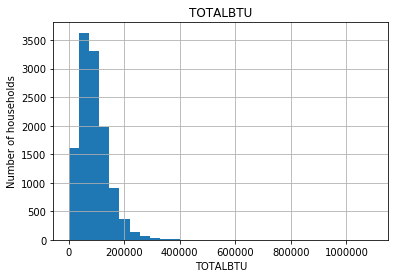

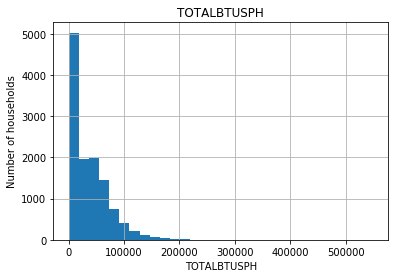

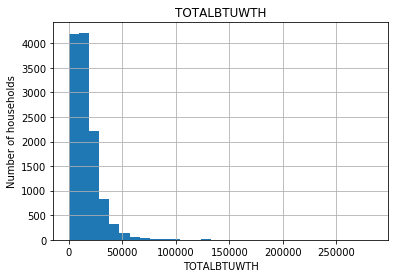

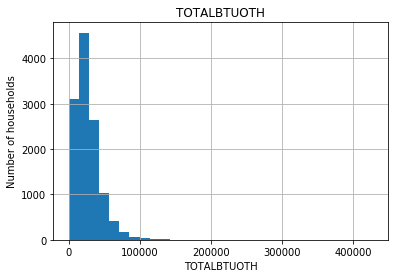

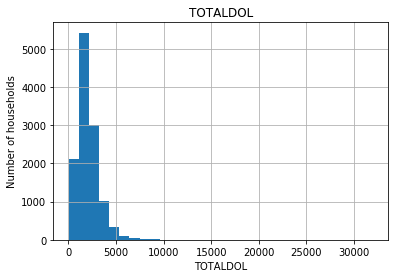

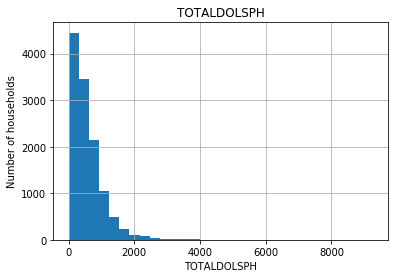

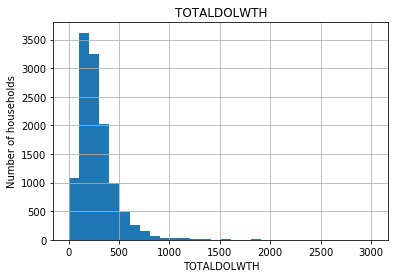

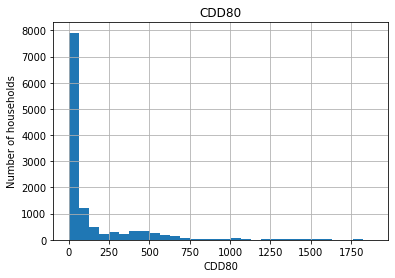

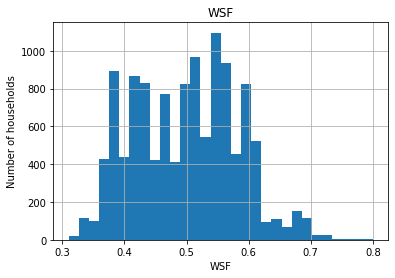

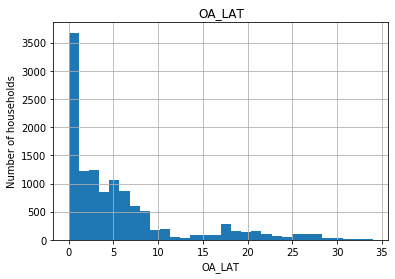

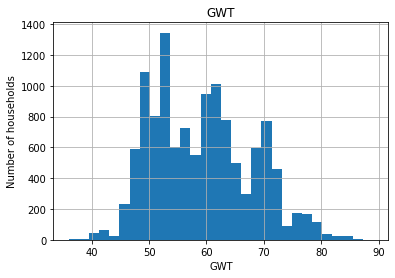

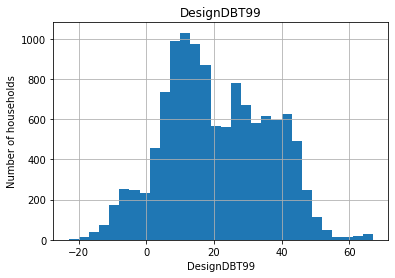

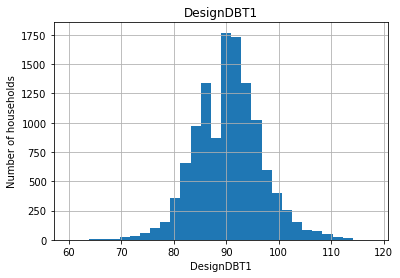

In [16]:
# analyse the distributions of some continuous variables

def analyse_continuous(df, var):
    df = df.copy()
    df[var].hist(bins=30)
    plt.ylabel('Number of households')
    plt.xlabel(var)
    plt.title(var)
    plt.show()

for var in cont_vars[50: ]:
    analyse_continuous(data, var)

Some of the features are highly skewed, so we need to normalize data

#### Categorical Variables

In [17]:
# capture categorical variables in a list
cat_vars = [var for var in data.columns if data[var].dtypes == 'O']

print('Number of categorical variables: ', len(cat_vars))

Number of categorical variables:  5


In [18]:
# visualise the values of the categorical variables
data[cat_vars].head()

,METROMICRO,UR,NOCRCASH,NKRGALNC,IECC_Climate_Pub
0,METRO,U,-2,-2,4A
1,METRO,U,-2,-2,3C
2,METRO,U,-2,-2,5A
3,METRO,U,-2,-2,5A
4,METRO,U,-2,-2,5A


In [19]:
data.drop(['NOCRCASH', 'NKRGALNC'], axis=1, inplace=True)

In [20]:
cat_vars.remove('NOCRCASH')
cat_vars.remove('NKRGALNC')

# final list of categorical variables
cat_vars

['METROMICRO', 'UR', 'IECC_Climate_Pub']

#### Number of labels: cardinality

In [21]:
data[cat_vars].nunique()

METROMICRO           3
UR                   2
IECC_Climate_Pub    11
dtype: int64

All the categorical variables show low cardinality, this means that they have only few different labels. That is good as we won't need to tackle cardinality during feature engineering

#### Rare labels:

Investigate if there are labels that are present only in a small number of households:

In [22]:
def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()

    # determine the % of observations per category
    tmp = df.groupby(var)['KWH'].count() / len(df)

    # return categories that are rare
    return tmp[tmp < rare_perc]

# print categories that are present in less than
# 1 % of the observations


for var in cat_vars:
    print(analyse_rare_labels(data, var, 0.01))
    print()

Series([], Name: KWH, dtype: float64)

Series([], Name: KWH, dtype: float64)

Series([], Name: KWH, dtype: float64)



In [23]:
# define independent and dependent variables
X = data.drop(['KWH'], axis=1)
y = data['KWH'].values

#### Create dummy for categorical data

In [24]:
X_dummies = pd.get_dummies(X).values

In [25]:
X_dummies.shape

(12083, 451)

In [26]:
#splitting the dataset into the Training set and test set
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X_dummies, y,test_size = 0.3 , random_state = 42)

#### Standardization

In [27]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [28]:
X_train.shape

(8458, 451)

#### Feature selection
select important features to speed up training process using RandomForestClassifier

In [29]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

In [30]:
# configure to select a subset of features
fs = SelectFromModel(RandomForestRegressor(n_estimators=300), threshold="median", max_features= 300)

In [31]:
# learn relationship from training data
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)


In [32]:
# shape of data after feature selection
X_train_fs.shape

(8458, 226)

### Model Building: apply some regression models 
In this step, we try to compare multiple common models for prediction and evalute their performance.

#### Simple Linear Regression (SLR)

In [33]:
from sklearn.linear_model import LinearRegression
# call model
SL_regressor = LinearRegression()
# fit SLR to data
SL_regressor.fit(X_train_fs, y_train)

LinearRegression()

In [34]:
# predict test set
y_pred_SLR = SL_regressor.predict(X_test_fs)

In [35]:
from sklearn import metrics

# model evaluation for testing set

mae = metrics.mean_absolute_error(y_test, y_pred_SLR)
mse = metrics.mean_squared_error(y_test, y_pred_SLR)
r2 = metrics.r2_score(y_test, y_pred_SLR)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 0.004268713442550506
MSE is 3.1281967992256684e-05
R2 score is 0.9999999999993892


The model explains 99.99% of the variance of the target variable. 
We can visualize the errors by plotting predicted against actuals and the residual (the error) of each prediction.

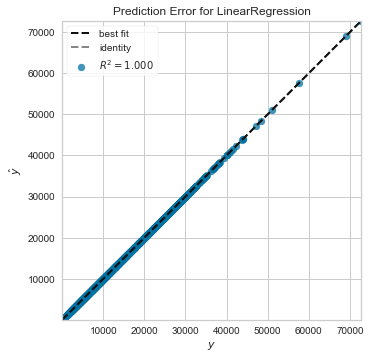

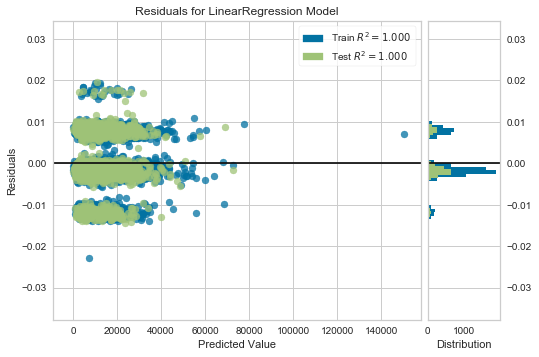

In [36]:
from yellowbrick.regressor import PredictionError, ResidualsPlot

# Plot predicted vs true
visualizer1 = PredictionError(SL_regressor)
visualizer1.fit(X_train_fs, y_train)  
visualizer1.score(X_test_fs, y_test) 
visualizer1.show()

# Plot predicted vs residuals
visualizer2 = ResidualsPlot(SL_regressor)
visualizer2.fit(X_train_fs, y_train)  
visualizer2.score(X_test_fs, y_test)  
visualizer2.show()

#### Random Forest Regression

In [39]:
from sklearn.ensemble import RandomForestRegressor

#Fitting the Random Forest regression model to the dataset
rf_regressor = RandomForestRegressor(n_estimators = 300 , random_state = 0)
rf_regressor.fit(X_train_fs, y_train)

y_pred_rf = rf_regressor.predict(X_test_fs)

In [40]:
# model evaluation for testing set

mae = metrics.mean_absolute_error(y_test, y_pred_rf)
mse = metrics.mean_squared_error(y_test, y_pred_rf)
r2 = metrics.r2_score(y_test, y_pred_rf)

print("RandomForest model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

RandomForest model performance for testing set
--------------------------------------
MAE is 477.2585360919541
MSE is 837222.4286961473
R2 score is 0.9836520918756649


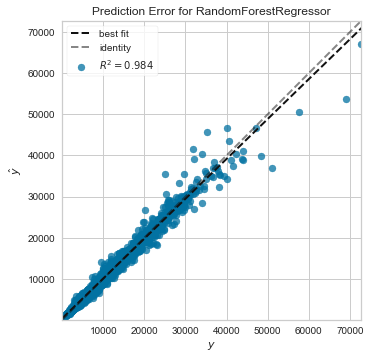

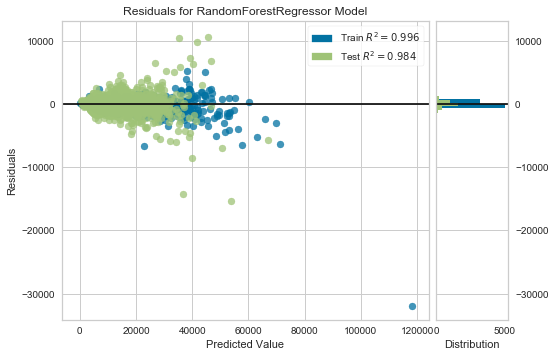

In [41]:
## Plot predicted vs true
visualizer1 = PredictionError(rf_regressor)
visualizer1.fit(X_train_fs, y_train) 
visualizer1.score(X_test_fs, y_test) 
visualizer1.show()

# Plot predicted vs residuals
visualizer2 = ResidualsPlot(rf_regressor)
visualizer2.fit(X_train_fs, y_train)  
visualizer2.score(X_test_fs, y_test)  
visualizer2.show()

#### Multi-layer Perceptron regressor (MLP)

In [42]:
from sklearn.neural_network import MLPRegressor

MLP_regressor = MLPRegressor(random_state=1, max_iter=500).fit(X_train_fs, y_train)

y_pred_MLP = MLP_regressor.predict(X_test_fs)

C:\Users\M_AMIRKH\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [43]:
# model evaluation for testing set

mae = metrics.mean_absolute_error(y_test, y_pred_MLP)
mse = metrics.mean_squared_error(y_test, y_pred_MLP)
r2 = metrics.r2_score(y_test, y_pred_MLP)

print("MLPRegressor model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

MLPRegressor model performance for testing set
--------------------------------------
MAE is 703.795557241082
MSE is 888557.7145810229
R2 score is 0.9826497005057999


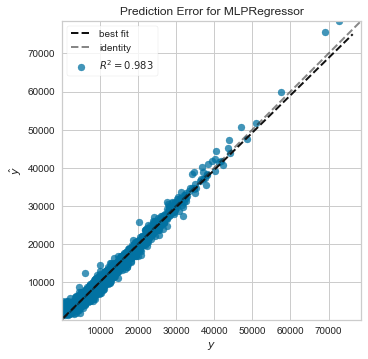

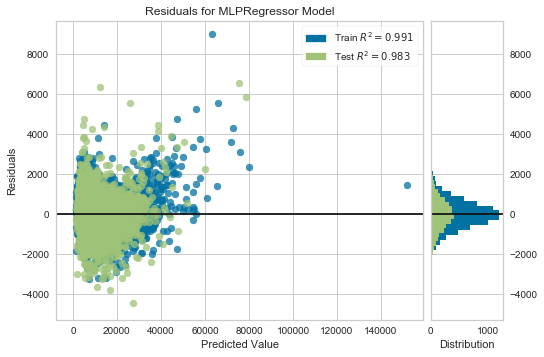

In [44]:
# Plot predicted vs true
visualizer1 = PredictionError(MLP_regressor)
visualizer1.fit(X_train_fs, y_train) 
visualizer1.score(X_test_fs, y_test) 
visualizer1.show()

# Plot predicted vs residuals
visualizer2 = ResidualsPlot(MLP_regressor)
visualizer2.fit(X_train_fs, y_train)  
visualizer2.score(X_test_fs, y_test)  
visualizer2.show()

#### Support Vector Regression (SVR)

In [45]:
from sklearn.svm import SVR
#Fitting SVR to the dataset
SVR_regressor = SVR( kernel='linear').fit(X_train_fs, y_train)

y_pred_SVR = SVR_regressor.predict(X_test_fs)


In [46]:
# model evaluation for testing set

mae = metrics.mean_absolute_error(y_test, y_pred_SVR)
mse = metrics.mean_squared_error(y_test, y_pred_SVR)
r2 = metrics.r2_score(y_test, y_pred_SVR)

print("SVR model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

SVR model performance for testing set
--------------------------------------
MAE is 366.86068494567587
MSE is 340181.37256090797
R2 score is 0.9933574954114681


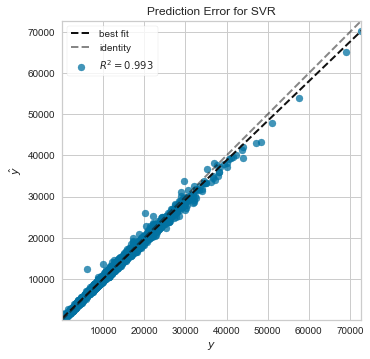

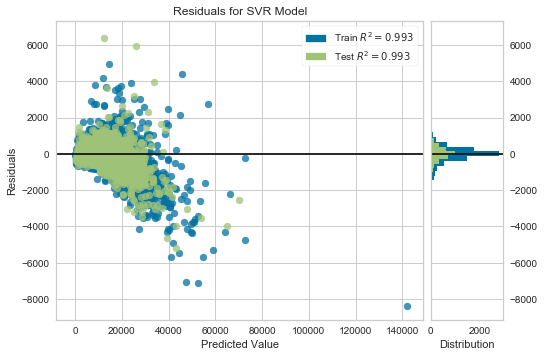

In [47]:
# Plot predicted vs true
visualizer1 = PredictionError(SVR_regressor)
visualizer1.fit(X_train_fs, y_train) 
visualizer1.score(X_test_fs, y_test) 
visualizer1.show()

# Plot predicted vs residuals
visualizer2 = ResidualsPlot(SVR_regressor)
visualizer2.fit(X_train_fs, y_train)  
visualizer2.score(X_test_fs, y_test)  
visualizer2.show()

#### Gradient Boosting Regressor

In [48]:
from sklearn.ensemble import GradientBoostingRegressor

gb_regressor = GradientBoostingRegressor(n_estimators=400, learning_rate=0.1).fit(X_train_fs, y_train)

y_pred_gb = gb_regressor.predict(X_test_fs)

In [49]:
# model evaluation for testing set

mae = metrics.mean_absolute_error(y_test, y_pred_gb)
mse = metrics.mean_squared_error(y_test, y_pred_gb)
r2 = metrics.r2_score(y_test, y_pred_gb)

print("GBR model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

GBR model performance for testing set
--------------------------------------
MAE is 303.0617252406489
MSE is 261008.53136044162
R2 score is 0.9949034529605313


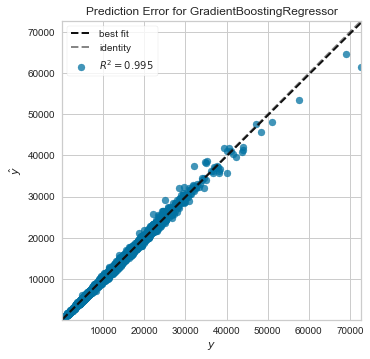

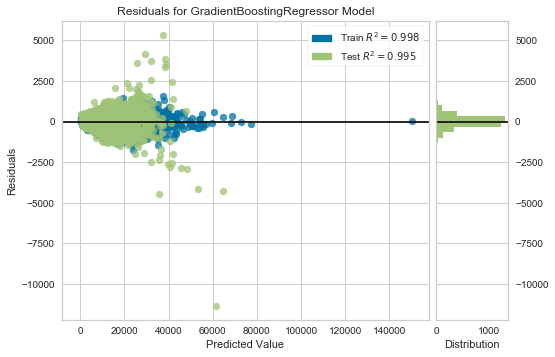

In [50]:
# Plot predicted vs true
visualizer1 = PredictionError(gb_regressor)
visualizer1.fit(X_train_fs, y_train) 
visualizer1.score(X_test_fs, y_test) 
visualizer1.show()

# Plot predicted vs residuals
visualizer2 = ResidualsPlot(gb_regressor)
visualizer2.fit(X_train_fs, y_train)  
visualizer2.score(X_test_fs, y_test)  
visualizer2.show()

#### Lasso (Linear Model trained with L1 prior as regularizer)

In [51]:
from sklearn.linear_model import Lasso

lasso_regressor = Lasso(alpha = 0.01)
lasso_regressor.fit(X_train_fs, y_train)

y_pred_lasso = lasso_regressor.predict(X_test_fs)

In [52]:
# model evaluation for testing set

mae = metrics.mean_absolute_error(y_test, y_pred_lasso)
mse = metrics.mean_squared_error(y_test, y_pred_lasso)
r2 = metrics.r2_score(y_test, y_pred_lasso)

print("GBR model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

GBR model performance for testing set
--------------------------------------
MAE is 4.785105297105106
MSE is 110.46487652149649
R2 score is 0.999997843022845


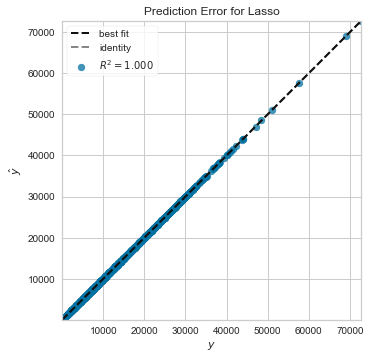

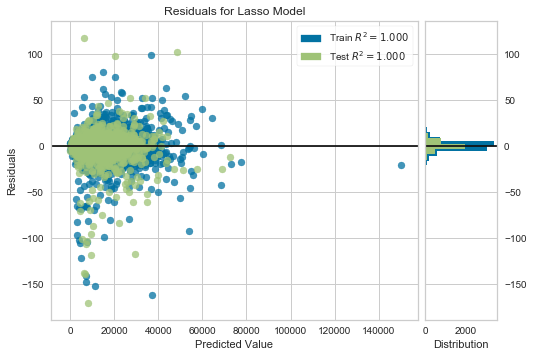

In [53]:
# Plot predicted vs true
visualizer1 = PredictionError(lasso_regressor)
visualizer1.fit(X_train_fs, y_train) 
visualizer1.score(X_test_fs, y_test) 
visualizer1.show()

# Plot predicted vs residuals
visualizer2 = ResidualsPlot(lasso_regressor)
visualizer2.fit(X_train_fs, y_train)  
visualizer2.score(X_test_fs, y_test)  
visualizer2.show()